In [2]:
%pip install -qU pypdf langchain-community langchain-text-splitters


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from langchain_community.document_loaders import PyPDFLoader
pdf_file_path = './income_tax.pdf'
loader = PyPDFLoader(pdf_file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [8]:
pages[35]

Document(metadata={'source': './income_tax.pdf', 'page': 35}, page_content='법제처                                                            36                                                       국가법령정보센터\n소득세법\n[전문개정 2009. 12. 31.]\n[제목개정 2014. 1. 1.]\n \n제54조의2(공동사업에 대한 소득공제 등 특례) 제51조의3 또는 「조세특례제한법」에 따른 소득공제를 적용하거나 제\n59조의3에 따른 세액공제를 적용하는 경우 제43조제3항에 따라 소득금액이 주된 공동사업자의 소득금액에 합산과\n세되는 특수관계인이 지출ㆍ납입ㆍ투자ㆍ출자 등을 한 금액이 있으면 주된 공동사업자의 소득에 합산과세되는 소득\n금액의 한도에서 주된 공동사업자가 지출ㆍ납입ㆍ투자ㆍ출자 등을 한 금액으로 보아 주된 공동사업자의 합산과세되\n는 종합소득금액 또는 종합소득산출세액을 계산할 때에 소득공제 또는 세액공제를 받을 수 있다. <개정 2012. 1. 1.,\n2014. 1. 1.>\n[전문개정 2009. 12. 31.]\n[제목개정 2014. 1. 1.]\n \n         제4절 세액의 계산 <개정 2009. 12. 31.>\n           제1관 세율 <개정 2009. 12. 31.>\n \n제55조(세율) ①거주자의 종합소득에 대한 소득세는 해당 연도의 종합소득과세표준에 다음의 세율을 적용하여 계산한\n금액(이하 “종합소득산출세액”이라 한다)을 그 세액으로 한다. <개정 2014. 1. 1., 2016. 12. 20., 2017. 12. 19., 2020.\n12. 29., 2022. 12. 31.>\n② 거주자의 퇴직소득에 대한 소득세는 다음 각 호의 순서에 따라 계산한 금액(이하 “퇴직소득 산출세액”이라 한다\n)으로 한다.<개정 2013. 1. 1., 2014. 12. 23.>\n

In [9]:
%pip install -q py-zerox


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [12]:
%pip install -q nest_asyncio


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
import nest_asyncio
nest_asyncio.apply()

In [14]:
from pyzerox import zerox
import os
import json
import asyncio

### Model Setup (Use only Vision Models) Refer: https://docs.litellm.ai/docs/providers ###

## placeholder for additional model kwargs which might be required for some models
kwargs = {}

## system prompt to use for the vision model
custom_system_prompt = None

# to override
# custom_system_prompt = "For the below pdf page, do something..something..." ## example

###################### Example for OpenAI ######################
model = "gpt-4o-mini" ## openai model

# Define main async entrypoint
async def main():
    file_path = "./income_tax.pdf" ## local filepath and file URL supported

    ## process only some pages or all
    select_pages = None ## None for all, but could be int or list(int) page numbers (1 indexed)

    output_dir = "./documents" ## directory to save the consolidated markdown file
    result = await zerox(file_path=file_path, model=model, output_dir=output_dir,
                        custom_system_prompt=custom_system_prompt,select_pages=select_pages, **kwargs)
    return result


# run the main function:
result = asyncio.run(main())

# print markdown result
print(result)

ZeroxOutput(completion_time=286165.486, file_name='income_tax', input_tokens=439012, output_tokens=161326, pages=[Page(content='# 소득세법\n\n[시행 2024. 7. 1.] [법률 제19933호, 2023. 12. 31., 일부개정]\n기획재정부 (세제실) 044-215-4312\n국세청 (소득세과) 044-215-4216\n기획재정부 (음식세제과) 044-215-4233\n기획재정부 (소득세과(사인선소, 기타소득)) 044-215-4217\n\n## 제1장 총칙\n### 제1조(목적)\n이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 조세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다.  \n[본조신설 2009. 12. 31.]  \n[종전 제1조는 제2조로 이동 2009. 12. 31.]\n\n### 제2조(정의)\n① 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2010. 12. 27., 2014. 12. 23., 2018. 12. 31.>\n1. “거주자”란 국내에 주소를 둔지 183일 이상인 거주(居住)하는 개인을 말한다.\n2. “비거주자”란 거주자가 아닌 개인을 말한다.\n3. “국내거주자”란 법인세법 제2조 제1호에 따른 내국법인을 말한다.\n4. “외국법인”이란 법인세법 제2조 제3호에 따른 외국법인을 말한다.\n5. “사업자”란 사업소득이 있는 거주자를 말한다.  \n② 제1항에 따른 고유·사업소득·비거주자와의 구분은 대통령령으로 정한다.  \n[본조신설 2009. 12. 31.]\n\n### 제2조(납세의무)\n다음 각 호의 어느 하나에 해당하는 개인은 이 법에 따라 각자의 소득에 대한 소득세를 납부할 의무를 진다.\n1. 거주자\n2. 비거주자\n3. 사업자\n4. 외국법인에 국내원천소득(出所所得)에 있는 개인\n② 다음 각 호의 어느 하나에 해당하는 자는 

In [15]:
%pip install -q "unstructured[md]" nltk


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 100,
    separators=['\n\n', '\n']
)

In [3]:
from langchain_community.document_loaders import UnstructuredMarkdownLoader

markdown_path = "./documents/income_tax.md"
loader = UnstructuredMarkdownLoader(markdown_path)
document_list = loader.load_and_split(text_splitter)

In [8]:
document_list[43]

Document(metadata={'source': './documents/income_tax.md'}, page_content='[전문개정 2009. 12. 31.] [제목개정 2014. 1. 1.]\n\n제61절 세액의 계산 <개정 2009. 12. 31.>\n\n제1관 세율 <개정 2009. 12. 31.>\n\n제55조(세율) ① 거주자의 종합소득에 대한 소득세는 해당 연도의 종합소득과세표준의 다음의 세율을 적용하여 계산한 금액(이하 “종합소득산출세액”이라 한다)을 그 세액으로 한다. <개정 2014. 1. 1., 2016. 12. 20., 2017. 12. 19., 2020. 12. 29., 2022. 12. 31.>\n\n종합소득 과세표준 6개 구간\n\n세 율 과세표준 구간 1,400만원 이하 84만원(1,400만원을 초과하는 금액의 15퍼센트) 1,400만원 초과 ~  5,000만원 이하 622만원 + (5,000만원을 초과하는 금액의 24퍼센트) 5,000만원 초과 ~  8,800만원 이하 1,536만원 + (8,800만원을 초과하는 금액의 35퍼센트) 8,800만원 초과 ~  1억5천만원 이하 2,109만원 + (1억5천만원을 초과하는 금액의 38퍼센트) 1억5천만원 초과 ~  3억원 이하 4,406만원 + (3억원을 초과하는 금액의 40퍼센트) 3억원 초과 1억7,406만원 + (5억원을 초과하는 금액의 42퍼센트)\n\n② 거주자의 퇴직소득에 대한 소득세는 다음 각 호의 순서에 따라 계산한 금액(이하 “퇴직소득산출세액”이라 한다)으로 한다. <개정 2014. 1. 1., 2014. 12. 23.> 1. 해당 과세기간의 퇴직소득과세표준 제1항의 세율을 적용하여 계산한 금액 2. 제1호의 금액 12로 나눈 금액에 근속연수를 곱한 금액 3. 삭제<2014. 12. 23.>\n\n[전문개정 2009. 12. 31.] 제2관 세액공제 <개정 2009. 12. 31.>\n\n소 제 목\n\n제56조(배당세예정공제)\n\n① 거주자의 종합소득금액에 제

In [9]:
%pip install -q markdown html2text beautifulsoup4



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import markdown
from bs4 import BeautifulSoup

# Read the Markdown file
text_path = './documents/income_tax.txt'
with open(markdown_path, 'r', encoding='utf-8') as md_file:
    md_content = md_file.read()

# Convert Markdown to HTML
html_content = markdown.markdown(md_content)

# Use BeautifulSoup to extract text from HTML
soup = BeautifulSoup(html_content, 'html.parser')
text_content = soup.get_text()

# Save the text to a .txt file
with open(text_path, 'w', encoding='utf-8') as txt_file:
    txt_file.write(text_content)

print("Markdown converted to plain text successfully!")


Markdown converted to plain text successfully!


In [12]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(text_path)
document_list = loader.load_and_split(text_splitter)

In [16]:
document_list[39]

Document(metadata={'source': './documents/income_tax.txt'}, page_content='② 제50조제1항, 제70조제2항 또는 제74조에 따라 차세대초중신기록을 하여 할 사람이 제70조제43제1호에 따른 서류를 제출하는 경우에는 기본공제로서 거주자 본인이 된다는 것은 제50조제42제4호에 따른 제외대상에 적용을 감한다. 다만, 차차표추정신기 아래와 관계없이 그것을 남겨 제출하는 경우에는 해당되지 아니한다. <개정 2013. 1. 1., 2014. 1. 1.>\n③ 제50조에 따른 수시부과 결정의 경우에는 기초공제 중 거주자 본인이 대한 부분을 프로 국으로 기한 시정한다. \n[전문개정 2009. 12. 31.]\n[제목개정 2014. 1. 1.]\n제54조의2(공공사업에 대한 소득공제 등 특례) 제51조의3 또는 「조세특례제한법」에 따른 소득공제를 적용하거나 제59조의2에 따른 세액감면을 적용하는 경우 제53조제1항에 따라 주된 소득사업자의 소득공여에 합산과세되는 특수관계인의 지출·납입·투자 등을 한 금액이 있으면 주된 사업자의 소득에 합산과세되는 소득금액에 합산되거나 주된 공동사업자의 합산과세되는 종합소득세액 또는 종합소득산출세액을 계산할 때 소득공제를 받을 수 있다. \n<개정 2014. 1. 1.>\n[전문개정 2009. 12. 31.]\n[제목개정 2014. 1. 1.]\n제61절 세액의 계산 <개정 2009. 12. 31.>\n제1관 세율 <개정 2009. 12. 31.>\n제55조(세율) ① 거주자의 종합소득에 대한 소득세는 해당 연도의 종합소득과세표준의 다음의 세율을 적용하여 계산한 금액(이하 “종합소득산출세액”이라 한다)을 그 세액으로 한다. <개정 2014. 1. 1., 2016. 12. 20., 2017. 12. 19., 2020. 12. 29., 2022. 12. 31.>\n종합소득\n  과세표준 6개 구간\n|  세 율  |  과세표준 구간  |\n|---------|---------------

In [17]:
%pip install -q langchain-chroma


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model='text-embedding-3-large')

In [8]:
from langchain_chroma import Chroma

vector_store = Chroma.from_documents(
    documents=document_list,
    embedding=embeddings,
    collection_name = 'income_tax_collection',
    persist_directory = './income_tax_collection'
)

In [9]:
retriever = vector_store.as_retriever(search_kwargs={'k': 3})

In [10]:
query = '연봉 5천만원 직장인의 소득세는?'

In [11]:
retriever.invoke(query)

[Document(metadata={'source': './documents/income_tax.txt'}, page_content='- 1) 공익신탁법에 따른 공익신탁의 이익\n2. 사업소득 중 다음 각 목의 어느 하나에 해당하는 소득\n   가. 노 - 발 및 작업 소비에 이용하여 원료로 발생하는 소득\n   나. 일반 사업소득을 유용하는 자의 주택임대소득(제정법에 따른 기준시가가 12억원을 초과하는 주택 및 국외에 소재하는 주택의 임대소득도 제외한다) 또는 해당 사업기록이 대통령령으로 정하는 총수입금액의 합계액이 2천만원 이하인 자의 주택임대소득의 산정 중요한 사항을 대통령령으로 정한다.\n3. 대통령령으로 정하는 영업이익소득\n4. 대통령령으로 정하는 전종주지 제도에서 발생하는 소득\n5. 증별기간이 5년 이상인 민사(民事) 임목(林木)이 발생 또는 양도 되는 소득으로서 연 600만원 이하 금액, 이 경우 출입기간 및 세액의 필요사항을 대통령령으로 정한다.\n6. 대통령령으로 정하는 작물재배법에서 발생하는 소득\n7. 대통령령으로 정하는 생산물이나 용역이 발생하는 소득\n8. 근로소득 퇴직소득 중 다음 각 목의 어느 하나에 해당하는 소득\n   가. 일반 기업으로 정하는 복구 또는 언론 관련된 금액\n소특수편\n은 배상·보상 또는 위치(位置)의 성질이 있는 급여\n가. 근로기준법, 또는 ‘신체장애법’에 따라 근로자·선원 및 요양목적을 받은 요양급여, 휴업급여, 상병보상금(傷病補償金), 임시부전급여, 정황상급여, 유족보상금, 상실지급금 및 장례비와 장재비에 관한 법률에 따라 받는 실업급여, 육아휴직급여, 육아기 근로시간 단축 급여, 송치금지원급, 재해근로자에 관한 법률에 따라 받는 재치지원금, ‘구직급여법’, ‘지방공무원법’에 따른 공무원 또는 사립학교교직원 연금법, ‘평정직위표’에 적용받는 사람이 받은 법령에 따라 받는 육아휴직급여(사립학교법, 제70조2항에 따라 임용된 사립유치원 학교 장관 또는 규칙에 따라 지급받는 육아휴직수당으로서 대통령령으로 정하

In [13]:
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class AgentState(TypedDict):
    query: str
    context: List[Document]
    answer: str

In [14]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

In [15]:
def retrieve(state: AgentState):
    query = state['query']
    docs = retriever.invoke(query)
    return {'context': docs}

In [16]:
from langchain import hub
from langchain_openai import ChatOpenAI
prompt = hub.pull("rlm/rag-prompt")
llm = ChatOpenAI(model='gpt-4o')

/Users/jasonkang/.pyenv/versions/3.12.2/envs/inflearn-langgraph-lecture/lib/python3.12/site-packages/langsmith/client.py:256: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [17]:
def generate(state: AgentState):
    context = state['context']
    query = state['query']
    rag_chain = prompt | llm
    response = rag_chain.invoke({'question': query, 'context': context})
    return {'answer': response}

In [18]:
graph_builder.add_node('retrieve', retrieve)
graph_builder.add_node('generate', generate)

In [19]:
from langgraph.graph import START, END

graph_builder.add_edge(START, 'retrieve')
graph_builder.add_edge('retrieve', 'generate')
graph_builder.add_edge('generate', END)

In [20]:
graph = graph_builder.compile()

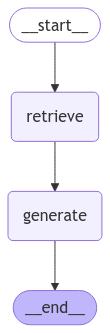

In [21]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
sequence_graph_builder = StateGraph(AgentState).add_sequence([retrieve, generate])

In [24]:
sequence_graph_builder.add_edge(START, 'retrieve')
sequence_graph_builder.add_edge('generate', END)

In [25]:
sequence_graph = sequence_graph_builder.compile()

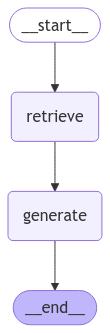

In [26]:
display(Image(sequence_graph.get_graph().draw_mermaid_png()))

In [27]:
initial_state = {'query': query}
graph.invoke(initial_state)

{'query': '연봉 5천만원 직장인의 소득세는?',
 'context': [Document(metadata={'source': './documents/income_tax.txt'}, page_content='- 1) 공익신탁법에 따른 공익신탁의 이익\n2. 사업소득 중 다음 각 목의 어느 하나에 해당하는 소득\n   가. 노 - 발 및 작업 소비에 이용하여 원료로 발생하는 소득\n   나. 일반 사업소득을 유용하는 자의 주택임대소득(제정법에 따른 기준시가가 12억원을 초과하는 주택 및 국외에 소재하는 주택의 임대소득도 제외한다) 또는 해당 사업기록이 대통령령으로 정하는 총수입금액의 합계액이 2천만원 이하인 자의 주택임대소득의 산정 중요한 사항을 대통령령으로 정한다.\n3. 대통령령으로 정하는 영업이익소득\n4. 대통령령으로 정하는 전종주지 제도에서 발생하는 소득\n5. 증별기간이 5년 이상인 민사(民事) 임목(林木)이 발생 또는 양도 되는 소득으로서 연 600만원 이하 금액, 이 경우 출입기간 및 세액의 필요사항을 대통령령으로 정한다.\n6. 대통령령으로 정하는 작물재배법에서 발생하는 소득\n7. 대통령령으로 정하는 생산물이나 용역이 발생하는 소득\n8. 근로소득 퇴직소득 중 다음 각 목의 어느 하나에 해당하는 소득\n   가. 일반 기업으로 정하는 복구 또는 언론 관련된 금액\n소특수편\n은 배상·보상 또는 위치(位置)의 성질이 있는 급여\n가. 근로기준법, 또는 ‘신체장애법’에 따라 근로자·선원 및 요양목적을 받은 요양급여, 휴업급여, 상병보상금(傷病補償金), 임시부전급여, 정황상급여, 유족보상금, 상실지급금 및 장례비와 장재비에 관한 법률에 따라 받는 실업급여, 육아휴직급여, 육아기 근로시간 단축 급여, 송치금지원급, 재해근로자에 관한 법률에 따라 받는 재치지원금, ‘구직급여법’, ‘지방공무원법’에 따른 공무원 또는 사립학교교직원 연금법, ‘평정직위표’에 적용받는 사람이 받은 법령에 따라 받는 육아휴직급여(사립학교법, 제70조2항에 따라 임용된 사립

In [28]:
initial_state = {'query': '연봉 5천만원 거주자의 소득세는 얼마인가요?'}
graph.invoke(initial_state)

{'query': '연봉 5천만원 거주자의 소득세는 얼마인가요?',
 'context': [Document(metadata={'source': './documents/income_tax.txt'}, page_content="타. 상각과 관련되어 국내에서 사상상 실시된 금 그와 관련된 소득으로 한정하는 소득으로 한다. \n파. 가무렵서 가무가의 구별이면 국내에서 하는 사업이나 국내외에서 제공하는 인적용역 또는 국내외 인 자유와 관련되어 있는 경제적 의로 받은 소득(과세 및 금융시장에 보할면 할 수 있는 거주자와와 차입금을 의하여 외국법인세와 발행방법의 경우에는 차입금 포함하며 아닌 단서) 또는 이하 유사한 소득으로 대통령인이 정하는 소득 \n[전문개정 2009. 12. 31.]\n[시행일: 2025. 1. 1.] 제119조2가목,제119조2제2항,제119조제2조통합\n제119조(비거주자의 국내원천소득) 비거주자의 국내원천소득은 다음 각 호와 같고 포함한다. <개정> 2012. 1. 1., 2013. 1. 1., 2015. 12. 15., 2016. 12. 20., 2018. 12. 31., 2019. 12. 31., 2020. 12. 31., 2023. 7. 18.>\n소득세법\n국가, 지방자치단체(지방자치단체합)을 포함한다. 이하 제156조제1항각무에서 같다. 거주자, 내국법인,\n비거주자 및 제84조에서 규정하는 외국법인의 국내사업장에서 발생하는 비거주자의 국내사업장으로부터 받은 소득\n국내원천 배당소득: 내국법인이 보는 배당과 그 밖의 국내에 소재하는 자본처럼 받는 다음 각 목의 소득\n  가. 제116조제1항호2)일에 따른 파생결합증권에 의하여 \n  나. 제117조제1항에 따른 배당소득(같은 제6조에 따른 소득을 제외한다)\n제87조제6항제4호에 따른 집합투자증권의 판매로 인해 발생한 이익 \n  나. 제87조제6항제1호에 따른 파생결합증권으로부터의 이익 중 대출성분으로 정의하는 이익 \n  다. 국가와 제조업정에 관한 배당소득 제133조 또는 제202